In [1]:
import pandas as pd
import seaborn as sns

# import the data file

churn_df = pd.read_json("Bank_Churn_2020_Train-20200210.json") # parse to a Pandas DataFrame using pd.read_csv()
# Take a look at the first 5 rows
churn_df.head()

,Active,Age,Balance,BankCC,ClientID,FICOScore,Firstname,Gender,LifeInsur,PlatStatus,Products,RegDeposits,Subsidiary,Surname,Terminated
0,0,37,122113.33,1,40ATL20120GM80095097706311P,624,Mindy,Female,1,1,2,5007,Atlanta,Graci,0
1,0,39,0.00,0,91CHL20100VI26913599075505N,670,Iraida,Female,1,0,2,7835,Chapel Hill,Veness,0
2,0,32,87992.57,0,61BOS20130LH10246893211788N,746,Hector,Male,0,0,1,8401,Boston,Latimore,0
3,0,36,1970.80,1,61BOS20150AC6028668471081P,796,Clifford,Male,1,1,2,8931,Boston,Aerts,0
4,0,49,83892.12,1,61BOS20190SR10901609271524N,584,Romeo,Male,0,0,1,8353,Boston,Swestka,1


In [2]:
churn_df.describe()

,Active,Age,Balance,BankCC,FICOScore,LifeInsur,Products,RegDeposits,Terminated
count,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000
mean,0.456208,39.214583,7.266221e+04,0.637333,624.726250,0.280250,1.530042,9.712217e+03,0.243292
std,0.498173,10.759454,6.475290e+05,0.480866,105.347391,0.449131,0.696085,4.400865e+04,0.429079
min,0.000000,3.000000,-1.283727e+05,0.000000,0.000000,0.000000,0.000000,-2.340000e+03,0.000000
25%,0.000000,32.000000,4.508350e+02,0.000000,552.000000,0.000000,1.000000,4.813000e+03,0.000000
50%,0.000000,38.000000,8.311797e+04,1.000000,624.000000,0.000000,1.000000,9.460500e+03,0.000000
75%,1.000000,45.000000,1.124337e+05,1.000000,696.000000,1.000000,2.000000,1.407400e+04,0.000000
max,2.000000,128.000000,1.000000e+08,2.000000,990.000000,1.000000,26.000000,6.775433e+06,1.000000


In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 15 columns):
Active         24000 non-null int64
Age            24000 non-null int64
Balance        24000 non-null float64
BankCC         24000 non-null int64
ClientID       24000 non-null object
FICOScore      24000 non-null int64
Firstname      24000 non-null object
Gender         24000 non-null object
LifeInsur      24000 non-null int64
PlatStatus     24000 non-null object
Products       24000 non-null int64
RegDeposits    24000 non-null int64
Subsidiary     24000 non-null object
Surname        24000 non-null object
Terminated     24000 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 2.7+ MB


# Variables in Data
* ClientID:  unique identifier of the bank customer
* Surname: surname of customer
* Firstname: firstname of customer
* FICOScore: the average credit score of the customer in the past year
* Subsidiary: the bank subsidiary that manages the customer relationship
* Gender: Female or Male
* Age: age of customer
* Balance: total balance across all accounts (if applicable) such as checking, savings and credit
* Product: number of banking products the customer uses
* BankCC: whether the customer has a credit card from the bank
* Active: indicates an active customer with regular transactions in the past 3 months
* RegDeposits: average monthly deposits that are made to the account across the past year (e.g., salary or pension)
* LifeInsur: whether the customer has a special life insurance policy from the bank
* PlatStatus: whether the customer has Platinum status at the bank (receives several perks and better service)
* Terminated: whether the customer closed their accounts with the bank within the 6 months following the download of the data from the bank's database

In [4]:
unique_subsidiary = churn_df['Subsidiary'].unique()
print(unique_subsidiary)
#we see there are only three subsidiaries so we convert this to categorical 


['Atlanta' 'Chapel Hill' 'Boston']


In [5]:
churn_df['Subsidiary'] = churn_df['Subsidiary'].astype('category')
churn_df['Sub_id'] = churn_df['Subsidiary'].cat.codes
churn_df.head()
#integer codes placed alphabetically Atlanta is 0, Boston is 1, Chapel Hill is 2

,Active,Age,Balance,BankCC,ClientID,FICOScore,Firstname,Gender,LifeInsur,PlatStatus,Products,RegDeposits,Subsidiary,Surname,Terminated,Sub_id
0,0,37,122113.33,1,40ATL20120GM80095097706311P,624,Mindy,Female,1,1,2,5007,Atlanta,Graci,0,0
1,0,39,0.00,0,91CHL20100VI26913599075505N,670,Iraida,Female,1,0,2,7835,Chapel Hill,Veness,0,2
2,0,32,87992.57,0,61BOS20130LH10246893211788N,746,Hector,Male,0,0,1,8401,Boston,Latimore,0,1
3,0,36,1970.80,1,61BOS20150AC6028668471081P,796,Clifford,Male,1,1,2,8931,Boston,Aerts,0,1
4,0,49,83892.12,1,61BOS20190SR10901609271524N,584,Romeo,Male,0,0,1,8353,Boston,Swestka,1,1


In [6]:
unique_gender = churn_df['Gender'].unique()
print(unique_gender)
#Found spelling error for female so we need to change before changing to binary response

['Female' 'Male' 'Feale']


In [7]:
churn_df['Gender']= churn_df['Gender'].replace('Feale', 'Female')
unique_gender2 = churn_df['Gender'].unique()
print(unique_gender2)
#fix Gender feature by getting rid of mislabeled date point with correct label

['Female' 'Male']


In [30]:
churn_df['Gender'] = churn_df['Gender'].astype('category')
churn_df['Gen_id'] = churn_df['Gender'].cat.codes
churn_df.head()

,Active,Age,Balance,BankCC,ClientID,FICOScore,Firstname,Gender,LifeInsur,PlatStatus,Products,RegDeposits,Subsidiary,Surname,Terminated,Sub_id,Gen_id
0,False,37,122113.33,True,40ATL20120GM80095097706311P,624,Mindy,Female,True,1,2,5007,Atlanta,Graci,0,False,0
1,False,39,0.00,False,91CHL20100VI26913599075505N,670,Iraida,Female,True,0,2,7835,Chapel Hill,Veness,0,True,0
2,False,32,87992.57,False,61BOS20130LH10246893211788N,746,Hector,Male,False,0,1,8401,Boston,Latimore,0,True,1
3,False,36,1970.80,True,61BOS20150AC6028668471081P,796,Clifford,Male,True,1,2,8931,Boston,Aerts,0,True,1
4,False,49,83892.12,True,61BOS20190SR10901609271524N,584,Romeo,Male,False,0,1,8353,Boston,Swestka,1,True,1


In [31]:
print(churn_df[churn_df['Age'] > 100])
#theres an outlier with a person who is of age 128 we will remove that to prevent this value from being an outlier for age based prediction
churn_df = churn_df.drop(churn_df[churn_df['Age']  > 100].index)

Empty DataFrame
Columns: [Active, Age, Balance, BankCC, ClientID, FICOScore, Firstname, Gender, LifeInsur, PlatStatus, Products, RegDeposits, Subsidiary, Surname, Terminated, Sub_id, Gen_id]
Index: []


In [32]:
churn_df.describe()

,Age,Balance,FICOScore,Products,RegDeposits,Terminated,Gen_id
count,23996.000000,2.399600e+04,23996.000000,23996.000000,2.399600e+04,23996.000000,23996.000000
mean,39.209493,7.266627e+04,624.719662,1.530005,9.712904e+03,0.243332,0.533172
std,10.743228,6.475826e+05,105.333989,0.695935,4.401222e+04,0.429103,0.498909
min,3.000000,-1.283727e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,32.000000,4.508350e+02,552.000000,1.000000,4.813750e+03,0.000000,0.000000
50%,38.000000,8.311797e+04,624.000000,1.000000,9.462500e+03,0.000000,1.000000
75%,45.000000,1.124415e+05,696.000000,2.000000,1.407400e+04,0.000000,1.000000
max,93.000000,1.000000e+08,990.000000,26.000000,6.775433e+06,1.000000,1.000000


In [33]:
#From the describe table we see that the max for Active and
#BankCC is 2 when both variables should be of binary values

unique_active = churn_df['Active'].unique()
print(unique_active)
unique_cc = churn_df['BankCC'].unique()
print(unique_cc)
#from this we see there are instances in the data where Active
#and BankCC are 2 so we need to find where and discern id this
#is a piece of bad data

[False  True]
[ True False]


In [34]:
print(churn_df[churn_df['Active'] == 2])
len(churn_df[churn_df['Active'] == 2])

Empty DataFrame
Columns: [Active, Age, Balance, BankCC, ClientID, FICOScore, Firstname, Gender, LifeInsur, PlatStatus, Products, RegDeposits, Subsidiary, Surname, Terminated, Sub_id, Gen_id]
Index: []


0

In [35]:
print(churn_df[churn_df['BankCC'] == 2])
len(churn_df[churn_df['BankCC'] == 2])


Empty DataFrame
Columns: [Active, Age, Balance, BankCC, ClientID, FICOScore, Firstname, Gender, LifeInsur, PlatStatus, Products, RegDeposits, Subsidiary, Surname, Terminated, Sub_id, Gen_id]
Index: []


0

In [36]:
# Now we see that from both Active and BankCC there is one
#instance each that has been mislabeled. Instead of making
#an assumption on activeness or owning a credit card we 
#elected to remove both instance of mislabeled data
churn_df = churn_df.drop(churn_df[churn_df['Active'] == 2].index)
churn_df = churn_df.drop(churn_df[churn_df['BankCC'] == 2].index)

In [37]:
churn_df.describe()

,Age,Balance,FICOScore,Products,RegDeposits,Terminated,Gen_id
count,23996.000000,2.399600e+04,23996.000000,23996.000000,2.399600e+04,23996.000000,23996.000000
mean,39.209493,7.266627e+04,624.719662,1.530005,9.712904e+03,0.243332,0.533172
std,10.743228,6.475826e+05,105.333989,0.695935,4.401222e+04,0.429103,0.498909
min,3.000000,-1.283727e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,32.000000,4.508350e+02,552.000000,1.000000,4.813750e+03,0.000000,0.000000
50%,38.000000,8.311797e+04,624.000000,1.000000,9.462500e+03,0.000000,1.000000
75%,45.000000,1.124415e+05,696.000000,2.000000,1.407400e+04,0.000000,1.000000
max,93.000000,1.000000e+08,990.000000,26.000000,6.775433e+06,1.000000,1.000000


In [38]:
churn_df.isnull().sum()

Active         0
Age            0
Balance        0
BankCC         0
ClientID       0
FICOScore      0
Firstname      0
Gender         0
LifeInsur      0
PlatStatus     0
Products       0
RegDeposits    0
Subsidiary     0
Surname        0
Terminated     0
Sub_id         0
Gen_id         0
dtype: int64

In [39]:

churn_df['PlatStatus']= churn_df['PlatStatus'].replace('yes', '1')

churn_df['PlatStatus'] = churn_df['PlatStatus'].astype('category')
unique_plat = churn_df['PlatStatus'].unique()

print(unique_plat)

[1, 0]
Categories (2, object): [1, 0]


In [40]:
churn_df = churn_df.drop(churn_df[churn_df['RegDeposits'] == -2340].index)

C:\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


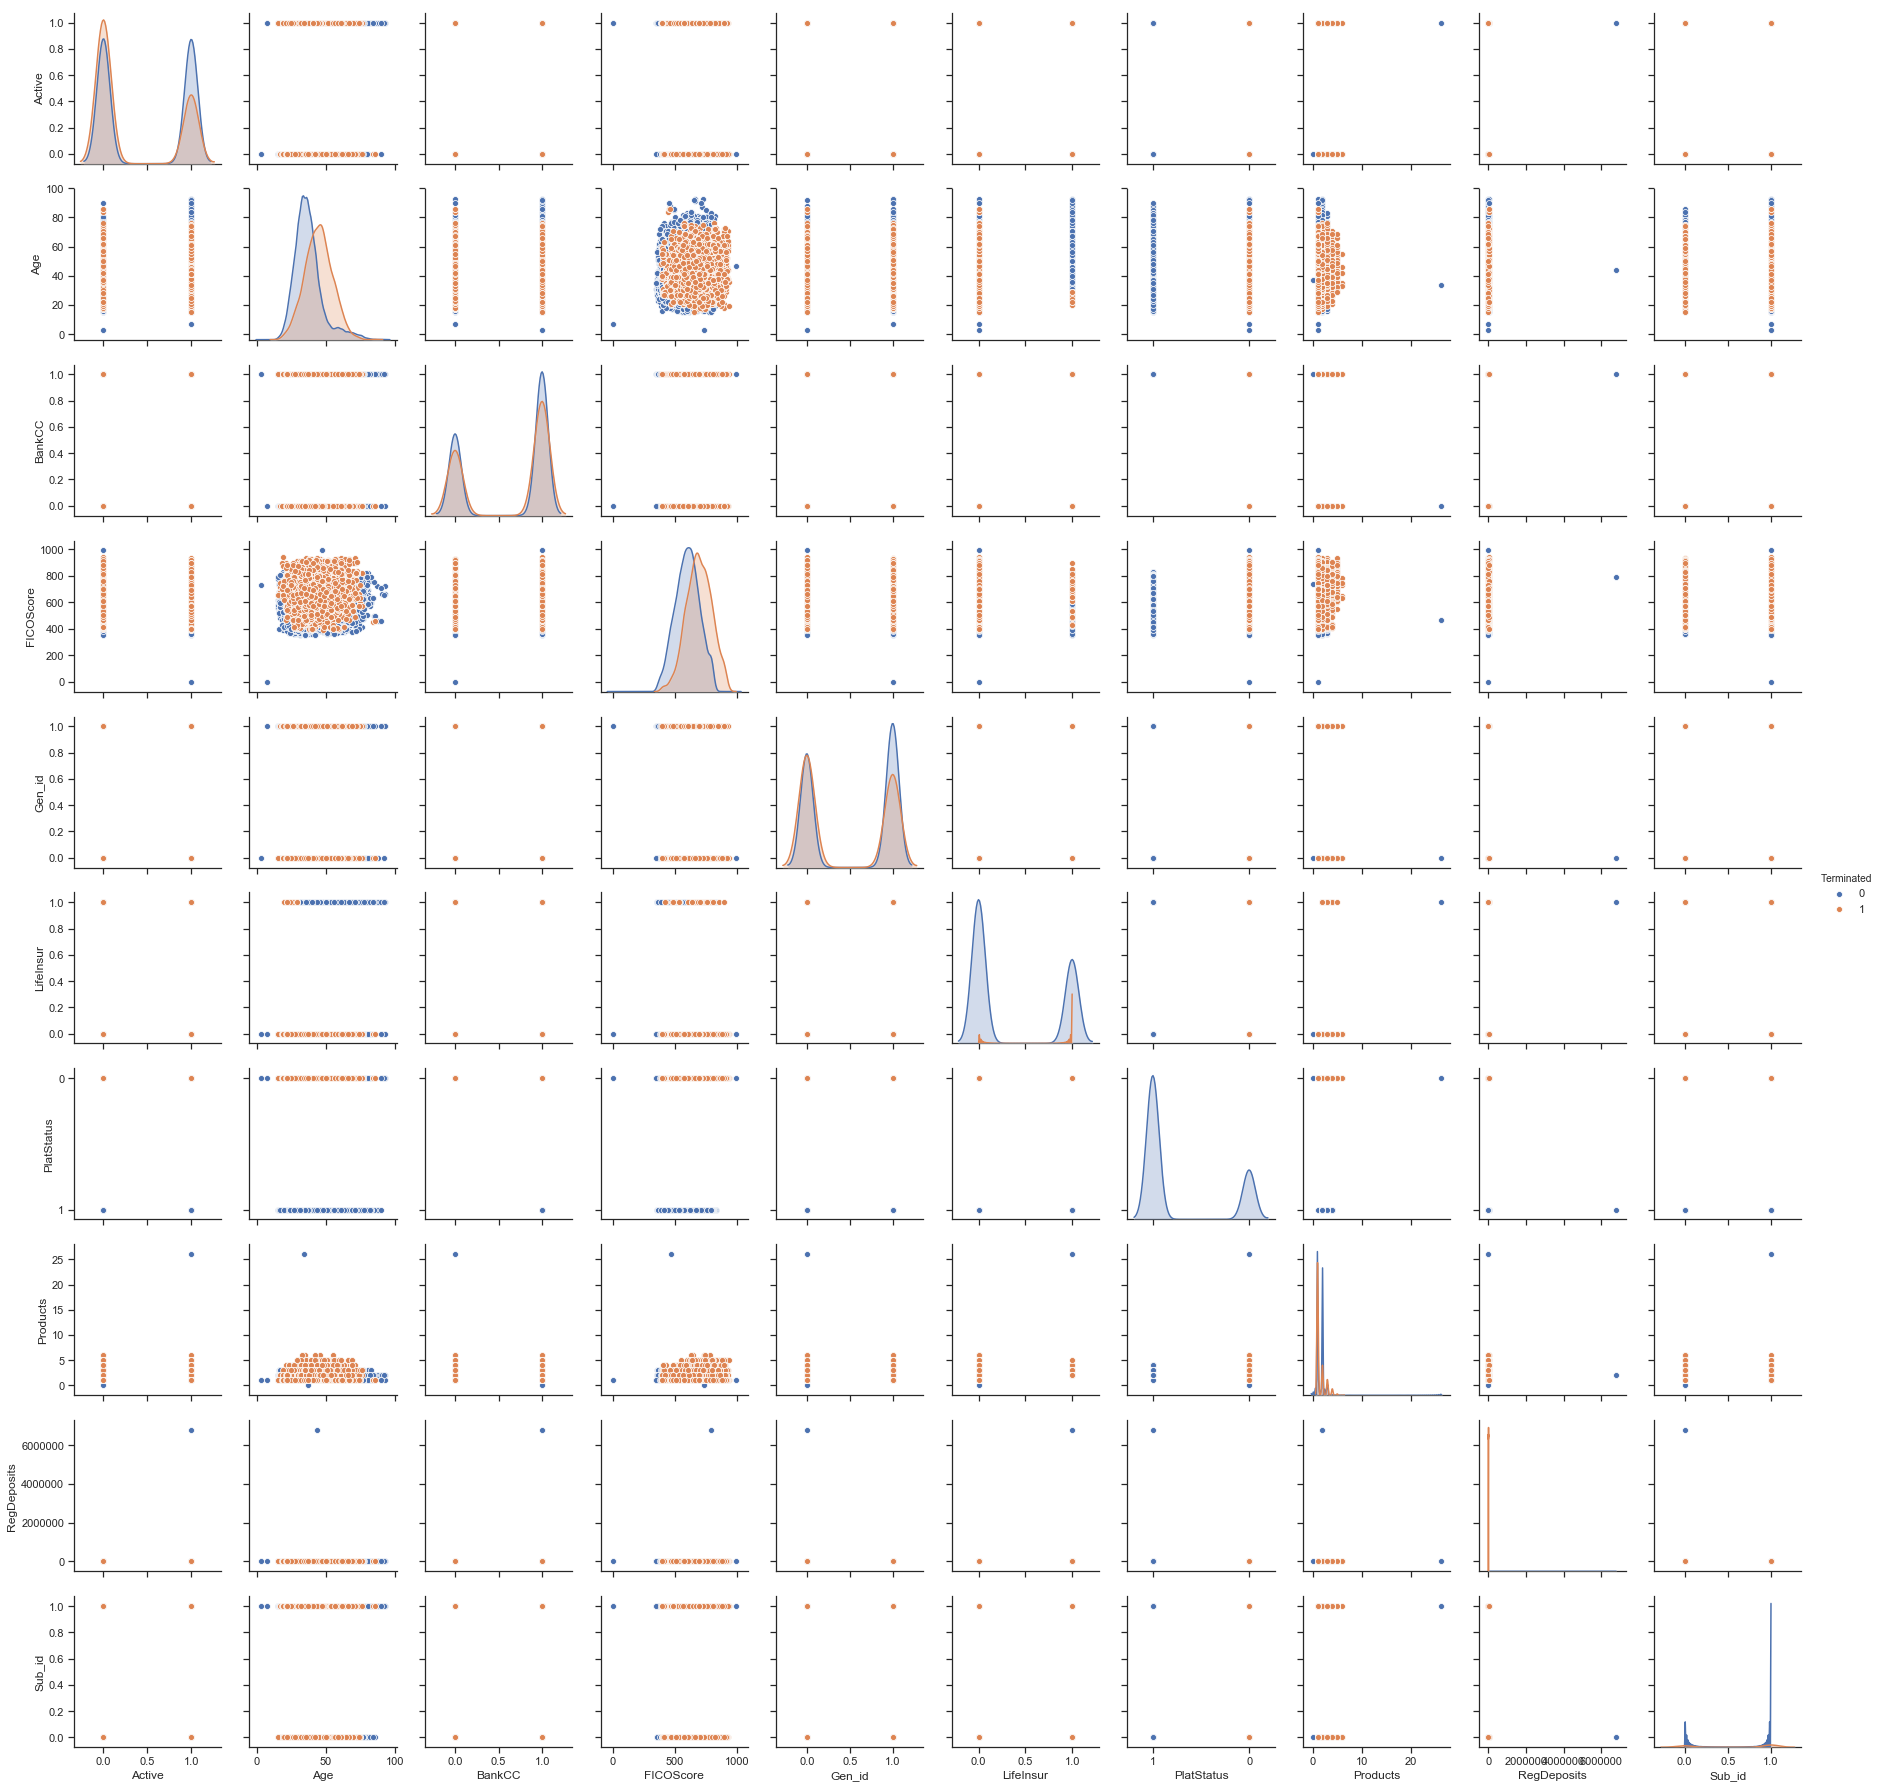

In [41]:
#For data exporation create a pair plot to see relationships with different features
sns.set(style="ticks")
sns.pairplot(churn_df, vars=['Active','Age', 'BankCC','FICOScore', 'Gen_id', 'LifeInsur', 'PlatStatus', 'Products', 'RegDeposits', 'Sub_id' ], hue='Terminated')

In [42]:
#change datatype of binary variables to boolean for model
for i in ['Active', 'BankCC', 'LifeInsur', 'Sub_id', 'Gen_id', 'Terminated']:
    churn_df[i] = churn_df[i].astype(bool)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23996 entries, 0 to 23999
Data columns (total 17 columns):
Active         23996 non-null bool
Age            23996 non-null int64
Balance        23996 non-null float64
BankCC         23996 non-null bool
ClientID       23996 non-null object
FICOScore      23996 non-null int64
Firstname      23996 non-null object
Gender         23996 non-null category
LifeInsur      23996 non-null bool
PlatStatus     23996 non-null category
Products       23996 non-null int64
RegDeposits    23996 non-null int64
Subsidiary     23996 non-null category
Surname        23996 non-null object
Terminated     23996 non-null bool
Sub_id         23996 non-null bool
Gen_id         23996 non-null bool
dtypes: bool(6), category(3), float64(1), int64(4), object(3)
memory usage: 2.5+ MB


In [43]:
#create numpy vectors of feature values and response values
X = churn_df.drop(['ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Terminated'], axis=1).values
y = churn_df['Terminated'].values

X_train shape: (19196, 11)
y_train shape: (19196,)
X_test shape: (4800, 11)
y_test shape: (4800,)
[0.691875, 0.746875, 0.7147916666666667, 0.748125, 0.7291666666666666, 0.7529166666666667, 0.7410416666666667, 0.7552083333333334, 0.7458333333333333, 0.7554166666666666, 0.75125, 0.7589583333333333, 0.7547916666666666, 0.7602083333333334, 0.7547916666666666, 0.7591666666666667, 0.7564583333333333, 0.7602083333333334, 0.7577083333333333, 0.7597916666666666, 0.7579166666666667, 0.76125, 0.7602083333333334, 0.760625, 0.7589583333333333, 0.760625, 0.7608333333333334, 0.760625, 0.76]


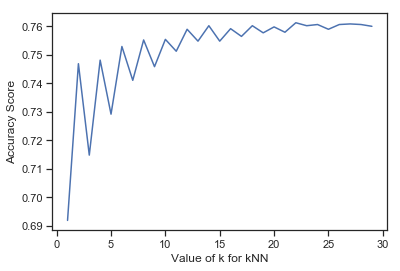

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)  # random_state=21 # stratify=y

# Check if our sample is split as we expected
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


# import the k-nearest neighbors classifier from sci-kit learn
from sklearn.neighbors import KNeighborsClassifier

#create score array to append accuracy scores for each different k, then we plot to see the difference in accuracy
score = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
print(score)
plt.plot(range(1,30), score)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy Score')
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

X_train shape: (19196, 2)
y_train shape: (19196,)
X_test shape: (4800, 2)
y_test shape: (4800,)
[0.78, 0.80625, 0.8077083333333334, 0.82125, 0.8229166666666666, 0.82875, 0.8241666666666667, 0.8260416666666667, 0.825, 0.8310416666666667, 0.8302083333333333, 0.8310416666666667, 0.8314583333333333, 0.8339583333333334, 0.831875, 0.8333333333333334, 0.8347916666666667, 0.8360416666666667, 0.8352083333333333, 0.8364583333333333, 0.8341666666666666, 0.8377083333333334, 0.8375, 0.835625, 0.83625, 0.8372916666666667, 0.8375, 0.838125, 0.8366666666666667]


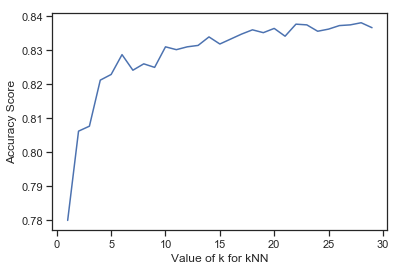

In [46]:
#Now that we have tried knn we try a knn using PCA and encode for two features
p_train, p_test, y_train, y_test = train_test_split(principalComponents, y, test_size=.2)  

# Check if our sample is split as we expected
print("X_train shape: {}".format(p_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(p_test.shape))
print("y_test shape: {}".format(y_test.shape))


# import the k-nearest neighbors classifier from sci-kit learn
from sklearn.neighbors import KNeighborsClassifier

#create score array to append accuracy scores for each different k, then we plot to see the difference in accuracy
pca_score = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_train, y_train)
    pca_score.append(knn.score(p_test, y_test))
print(pca_score)
plt.plot(range(1,30), pca_score)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy Score')
plt.show()

In [62]:
#Now we try a Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print the accuracy score as well as the classification report to observe f1-score
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3615
        True       0.84      0.72      0.77      1185

    accuracy                           0.90      4800
   macro avg       0.88      0.84      0.85      4800
weighted avg       0.89      0.90      0.89      4800

0.8964583333333334


In [64]:
#Look at the importance of each feature within our model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

X_df = churn_df.drop(['ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Terminated'], axis=1)
X_df.head()

Feature ranking:
1. feature 1 (0.232192)
2. feature 4 (0.218806)
3. feature 8 (0.147253)
4. feature 5 (0.134552)
5. feature 2 (0.106045)
6. feature 7 (0.060391)
7. feature 0 (0.030631)
8. feature 6 (0.021007)
9. feature 9 (0.020672)
10. feature 3 (0.015022)
11. feature 10 (0.013428)


,Active,Age,Balance,BankCC,FICOScore,LifeInsur,PlatStatus,Products,RegDeposits,Sub_id,Gen_id
0,False,37,122113.33,True,624,True,1,2,5007,False,False
1,False,39,0.00,False,670,True,0,2,7835,True,False
2,False,32,87992.57,False,746,False,0,1,8401,True,True
3,False,36,1970.80,True,796,True,1,2,8931,True,True
4,False,49,83892.12,True,584,False,0,1,8353,True,True


In [65]:
#Test different tree sizes
for i in [5, 10, 20, 100, 1000]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = RandomForestRegressor(n_estimators=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred.round()))
    print(accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

       False       0.91      0.94      0.93      3615
        True       0.79      0.73      0.76      1185

    accuracy                           0.89      4800
   macro avg       0.85      0.83      0.84      4800
weighted avg       0.88      0.89      0.88      4800

0.8864583333333333
              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3615
        True       0.84      0.70      0.76      1185

    accuracy                           0.89      4800
   macro avg       0.87      0.83      0.85      4800
weighted avg       0.89      0.89      0.89      4800

0.8920833333333333
              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3615
        True       0.84      0.72      0.77      1185

    accuracy                           0.90      4800
   macro avg       0.88      0.84      0.85      4800
weighted avg       0.89      0.90   

In [66]:
#Age, FICOScore, LifeInsur, and RegDeposits in that order were the 4 most important features 
#fit a Random Forest using only these 4 features
X_new = churn_df.drop(['Active', 'Balance', 'BankCC', 'PlatStatus', 'Products', 'Sub_id', 'Gen_id', 
'ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Terminated'], axis=1).values


X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))


              precision    recall  f1-score   support

       False       0.88      0.93      0.91      3615
        True       0.74      0.63      0.68      1185

    accuracy                           0.85      4800
   macro avg       0.81      0.78      0.79      4800
weighted avg       0.85      0.85      0.85      4800

0.8541666666666666


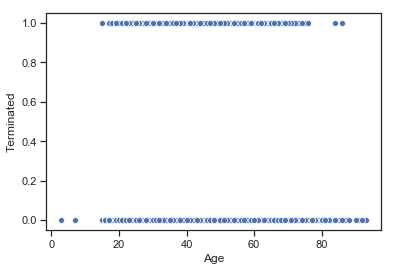

In [67]:
Age_df = churn_df.drop(['Active', 'Balance', 'BankCC', 'PlatStatus', 'Products', 'Sub_id', 'Gen_id', 
'ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'FICOScore', 'LifeInsur', 'RegDeposits'], axis=1)
ax = sns.scatterplot(x="Age", y="Terminated", data=Age_df)

,Age,Terminated
agerange,,
0-17,16.778947,0.073684
18-29,26.575901,0.095412
30-39,35.527322,0.146910
40-49,44.643905,0.382903
50-59,54.896734,0.611431


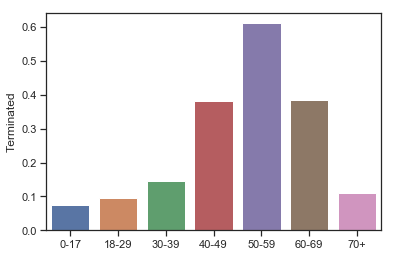

In [68]:
#create encoding for age groups
#take avergae of terminated across each age group
#plot bar plot with age group and mean
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']
Age_df['agerange'] = pd.cut(Age_df.Age, bins, labels = labels,include_lowest = True)
Age_df.head()
#Age_df = Age_df.drop(['Age'])
Age_df2 = Age_df.groupby('agerange').mean()

sns.barplot(x=labels, y= 'Terminated', data=Age_df2)
Age_df2.head()

,FICOScore,Terminated
FICOrange,,
300-399,382.503185,0.028662
400-499,462.018805,0.059366
500-599,555.802966,0.126799
600-699,648.327619,0.239881
700-799,744.806125,0.410663


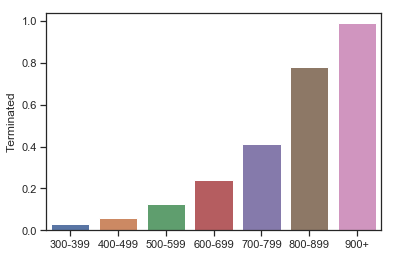

In [69]:
Fico_df = churn_df.drop(['Active', 'Balance', 'BankCC', 'PlatStatus', 'Products', 'Sub_id', 'Gen_id', 
'ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Age', 'LifeInsur', 'RegDeposits'], axis=1)

Fico_df = Fico_df.drop(Fico_df[Fico_df['FICOScore']  < 300].index)
Fico_df.head()
bins = [300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900+']
Fico_df['FICOrange'] = pd.cut(Fico_df.FICOScore, bins, labels = labels,include_lowest = True)
Fico_df.head()
Fico_df2 =Fico_df.groupby('FICOrange').mean()   

sns.barplot(x=labels, y= 'Terminated', data=Fico_df2)
Fico_df2.head()

In [70]:
Reg_dep_df = churn_df.drop(['Active', 'Balance', 'BankCC', 'PlatStatus', 'Products', 'Sub_id', 'Gen_id', 
'ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Age', 'LifeInsur', 'FICOScore'], axis=1)

#len(churn_df[churn_df['RegDeposits']  > 25000])

Reg_dep_df = Reg_dep_df.drop(Reg_dep_df[Reg_dep_df['RegDeposits']  > 25000].index)
Reg_dep_df.head()
bins = [0, 5000, 10000, 15000, 20000, 25000]
labels = ['0-4999', '5000-9999', '10000-14999', '15000-19999', '20000+']
Reg_dep_df['DepRange'] = pd.cut(Reg_dep_df.RegDeposits, bins, labels = labels,include_lowest = True)
#Reg_dep_df.head()
Reg_dep_df.groupby('DepRange').mean() 


,RegDeposits,Terminated
DepRange,,
0-4999,2486.919140,0.240655
5000-9999,7510.224072,0.230945
10000-14999,12469.550048,0.249762
15000-19999,16913.336462,0.255050
20000+,NaN,NaN


,Terminated
LifeInsur,
False,0.336170
True,0.004907


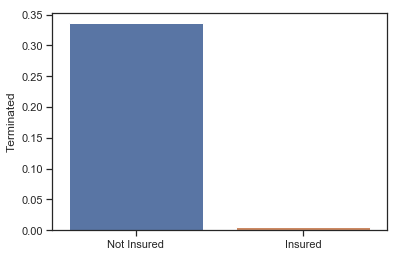

In [71]:
Life_insur_df = churn_df.drop(['Active', 'Balance', 'BankCC', 'PlatStatus', 'Products', 'Sub_id', 'Gen_id', 
'ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Age', 'RegDeposits', 'FICOScore'], axis=1)
Life_insur_df.head()
labels = ['Not Insured', 'Insured']
Life_insur_df2=Life_insur_df.groupby('LifeInsur').mean() 

sns.barplot(x=labels, y= 'Terminated', data=Life_insur_df2)
Life_insur_df2.head()

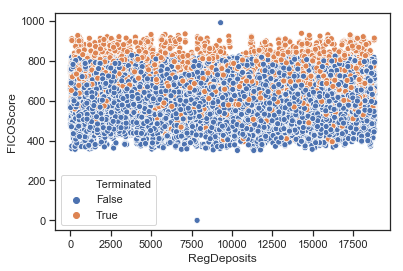

In [72]:
FICO_vs_regdep = churn_df.drop(['Active', 'Balance', 'BankCC', 'PlatStatus', 'Products', 'Sub_id', 'Gen_id', 
'ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Age', 'LifeInsur'], axis=1)
FICO_vs_regdep.head()
FICO_vs_regdep = FICO_vs_regdep.drop(FICO_vs_regdep[FICO_vs_regdep['RegDeposits']  > 20000].index)
sns.scatterplot(x='RegDeposits', y='FICOScore', hue='Terminated', data=FICO_vs_regdep)

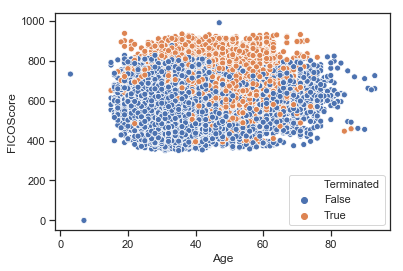

In [73]:
sns.scatterplot(x='Age', y='FICOScore', hue='Terminated', data=churn_df)

In [74]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3615
        True       0.85      0.75      0.79      1185

    accuracy                           0.90      4800
   macro avg       0.88      0.85      0.87      4800
weighted avg       0.90      0.90      0.90      4800

0.9045833333333333


In [75]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

X_df = churn_df.drop(['ClientID', 'Firstname', 'Subsidiary', 'Gender', 'Surname', 'Terminated'], axis=1)
X_df.head()

Feature ranking:
1. feature 4 (0.234571)
2. feature 1 (0.224780)
3. feature 8 (0.136453)
4. feature 2 (0.118464)
5. feature 5 (0.098539)
6. feature 7 (0.059666)
7. feature 6 (0.040838)
8. feature 0 (0.031326)
9. feature 9 (0.024391)
10. feature 3 (0.017134)
11. feature 10 (0.013838)


,Active,Age,Balance,BankCC,FICOScore,LifeInsur,PlatStatus,Products,RegDeposits,Sub_id,Gen_id
0,False,37,122113.33,True,624,True,1,2,5007,False,False
1,False,39,0.00,False,670,True,0,2,7835,True,False
2,False,32,87992.57,False,746,False,0,1,8401,True,True
3,False,36,1970.80,True,796,True,1,2,8931,True,True
4,False,49,83892.12,True,584,False,0,1,8353,True,True


In [76]:
for i in [5, 10, 20, 100, 1000]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    model = RandomForestClassifier(n_estimators=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred.round()))
    print(accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

       False       0.91      0.93      0.92      3615
        True       0.78      0.73      0.75      1185

    accuracy                           0.88      4800
   macro avg       0.85      0.83      0.84      4800
weighted avg       0.88      0.88      0.88      4800

0.8827083333333333
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      3615
        True       0.84      0.71      0.77      1185

    accuracy                           0.89      4800
   macro avg       0.87      0.83      0.85      4800
weighted avg       0.89      0.89      0.89      4800

0.893125
              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3615
        True       0.84      0.72      0.78      1185

    accuracy                           0.90      4800
   macro avg       0.88      0.84      0.86      4800
weighted avg       0.90      0.90      0.90   